In [2]:
# dataset={"csv_path":"../datasets/heat_map_full.csv","description":"Whole DataSet"}
dataset={"csv_path":"./heat_map_train.csv","description":"4 Subsets (colab)"}

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [42]:
def plot_histogram(df,dataset_description):
    zeros=[]
    nulls=[]
    ones=[]
    negative=[]

    for column in df.columns[2:16]:
        zeros.append((df[column]==0).sum())
        nulls.append( df[column].isnull().sum())
        ones.append((df[column]==1).sum())
        negative.append((df[column]==-1).sum())


    # make a histogram of the number of ones and zeros in each column
    fig, ax = plt.subplots(figsize=(12, 8))
    index = np.arange(len(df.columns[2:16]))
    bar_width = 0.15
    opacity = 0.8
    plt.bar(index, ones, bar_width, alpha=opacity, color='b', label='ones')
    plt.bar(index + bar_width, zeros, bar_width, alpha=opacity, color='r', label='zeros')
    plt.bar(index + 2*bar_width, nulls, bar_width, alpha=opacity, color='g', label='nulls')
    plt.bar(index + 3*bar_width, negative, bar_width, alpha=opacity, color='y', label='negative')

    plt.xlabel('Columns')
    plt.ylabel('Frequency')
    plt.title('Frequency of Labels per class (' + dataset_description+')')
    plt.xticks(index + bar_width, df.columns[2:16], rotation='vertical')
    plt.legend()
    plt.show()

In [13]:
# Read CSV File
df = pd.read_csv(dataset["csv_path"])

# Print column names with index
for i, col in enumerate(df.columns):
    print(f"Column {i}: {col}")

df.head()

Column 0: subject_id
Column 1: study_id
Column 2: Atelectasis
Column 3: Cardiomegaly
Column 4: Consolidation
Column 5: Edema
Column 6: Enlarged Cardiomediastinum
Column 7: Fracture
Column 8: Lung Lesion
Column 9: Lung Opacity
Column 10: No Finding
Column 11: Pleural Effusion
Column 12: Pleural Other
Column 13: Pneumonia
Column 14: Pneumothorax
Column 15: Support Devices
Column 16: image_id
Column 17: mimic_image_file_path


,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,image_id,mimic_image_file_path
0,13376901,53504425,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,40283650-a297ed47-91a9b726-01de9d21-f950777b,datasets/mimic-cxr-jpg\files/p13/p13376901/s53...
1,11597474,53309861,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,f9cf6d62-4101a651-a4d26b97-c9baea87-d32879b0,datasets/mimic-cxr-jpg\files/p11/p11597474/s53...
2,13026285,50843057,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,1.0,61fd1654-a84adc23-e9398143-aebcebd6-99326673,datasets/mimic-cxr-jpg\files/p13/p13026285/s50...
3,10933609,52935265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,9587ec7a-e6b7082f-0b22b670-b924b608-674375e2,datasets/mimic-cxr-jpg\files/p10/p10933609/s52...
4,10299240,50982428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,c7612af5-6788eebe-287cd099-92a1d9b7-39e00595,datasets/mimic-cxr-jpg\files/p10/p10299240/s50...


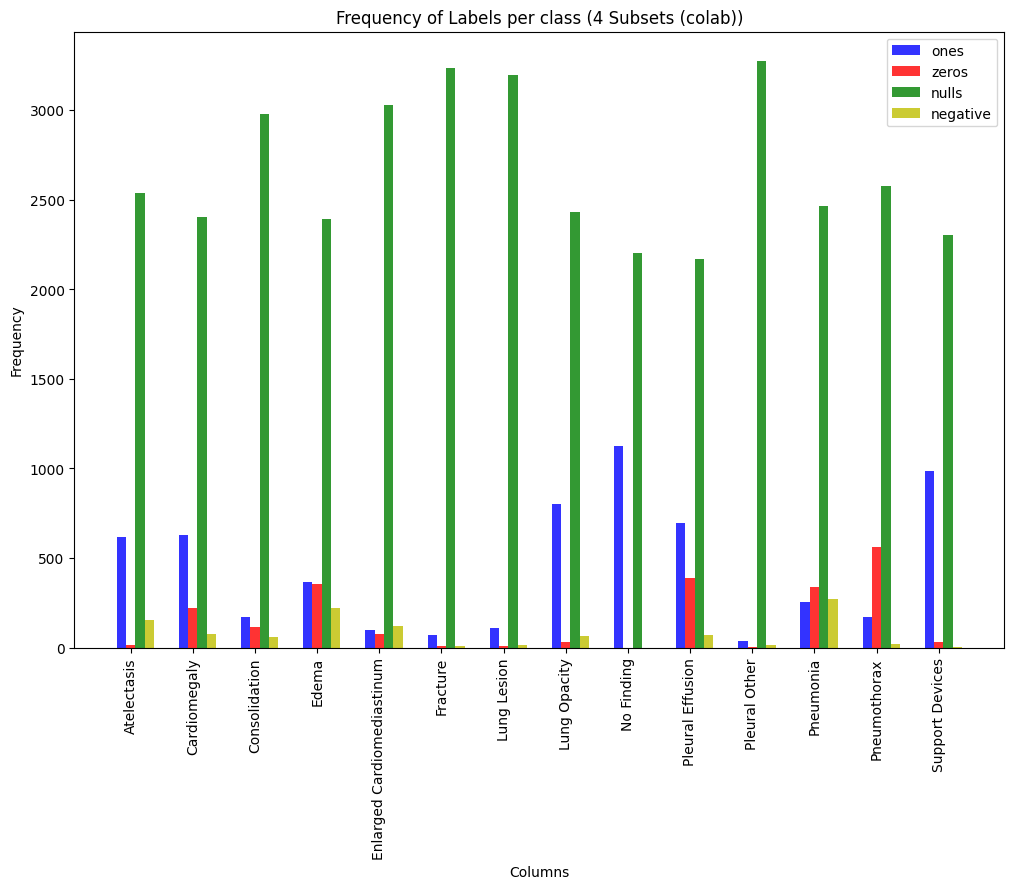

In [16]:
plot_histogram(df=df,dataset_description=dataset['description'])


### Drop Rows with high nulls

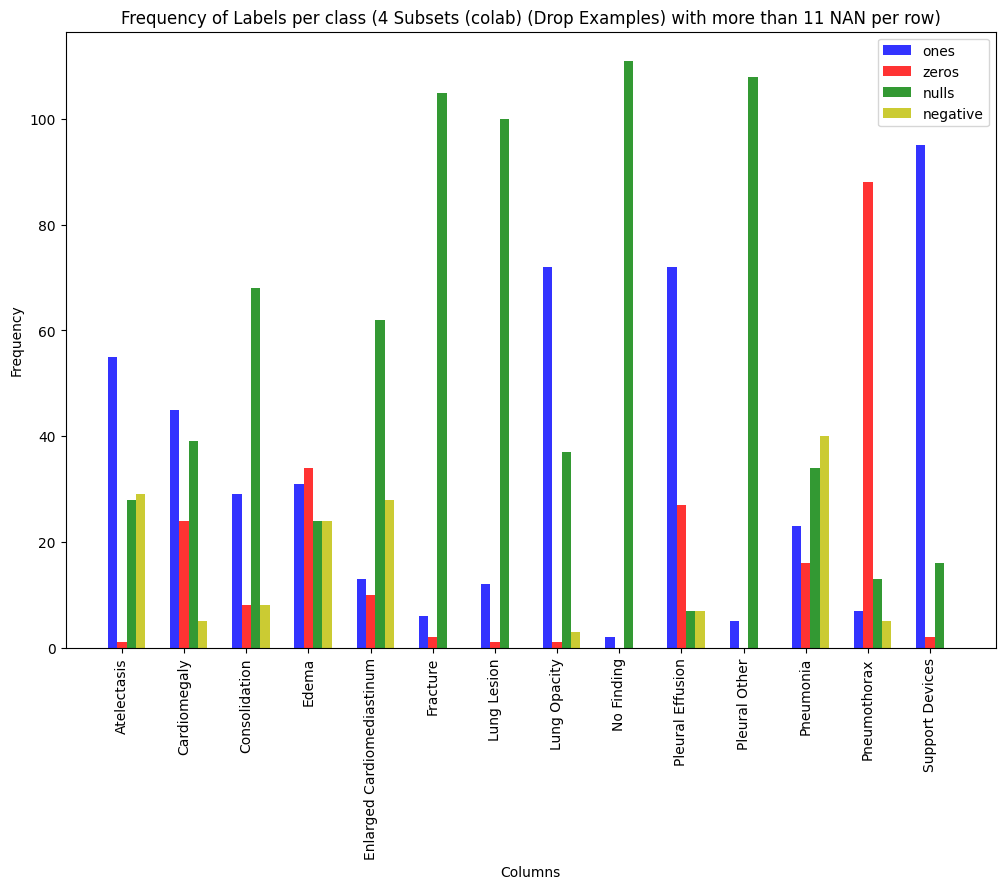

Number of rows dropped: 3215
Number of rows remaining: 113


In [23]:
# Drop rows with more than 7 NaN values
thresh=len(df.columns) - 7
# Drop rows with high number of missing values
df_drop_nan = df.dropna(thresh=thresh)

plot_histogram(df=df_drop_nan,dataset_description=dataset['description']+ f" (Drop Examples) with more than {thresh} NAN per row" )

# No of rows dropped
print(f"Number of rows dropped: {len(df) - len(df_drop_nan)}")
# no of rows remaining
print(f"Number of rows remaining: {len(df_drop_nan)}")

### Drop Rows with high zeros

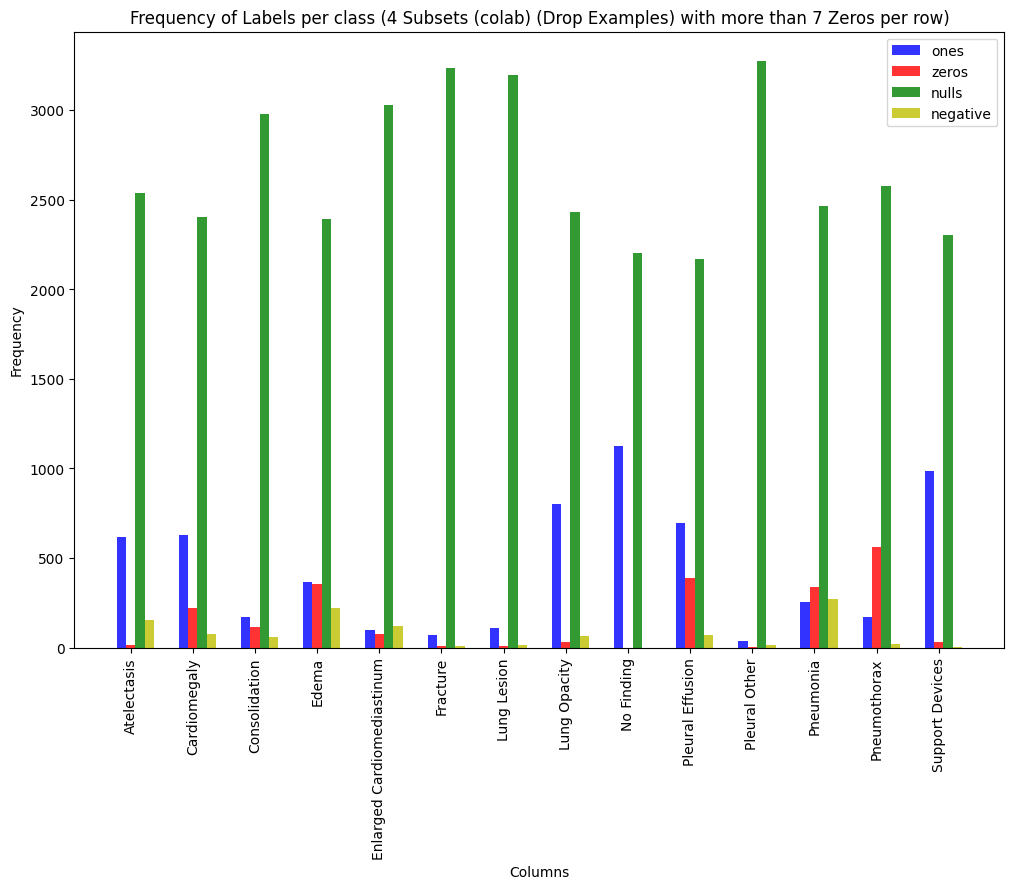

Number of rows dropped: 0
Number of rows remaining: 3328


In [28]:
# Drop rows with more than 7 Zeros values
thresh=7
# Drop rows with high number zeros
df_drop_zeros = df[(df==0.0).sum(axis=1)<thresh]

plot_histogram(df=df_drop_zeros,dataset_description=dataset['description']+ f" (Drop Examples) with more than {thresh} Zeros per row" )

# No of rows dropped
print(f"Number of rows dropped: {len(df) - len(df_drop_zeros)}")
# no of rows remaining
print(f"Number of rows remaining: {len(df_drop_zeros)}")


### Drop Rows with -1

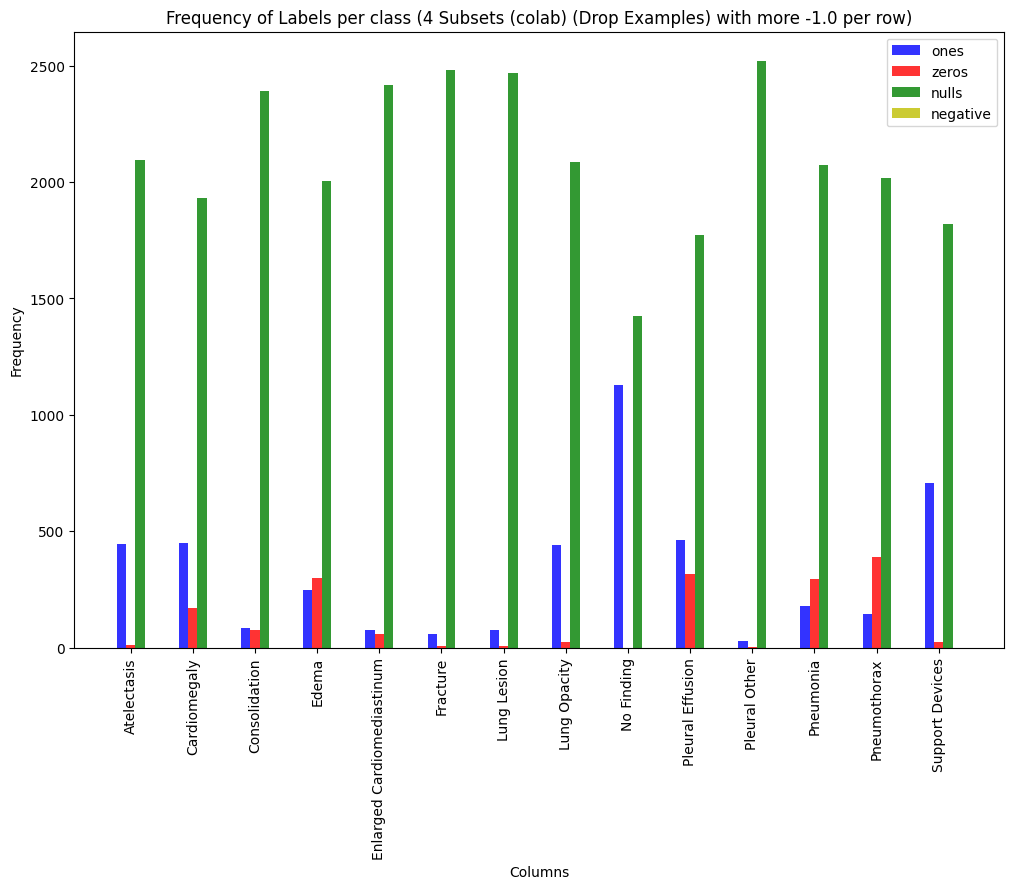

Number of rows dropped: 779
Number of rows remaining: 2549


In [29]:
# Drop rows with negative values
df_drop_negative = df[(df==-1.0).sum(axis=1)<1]

plot_histogram(df=df_drop_negative,dataset_description=dataset['description']+ f" (Drop Examples) with more -1.0 per row" )

# No of rows dropped
print(f"Number of rows dropped: {len(df) - len(df_drop_negative)}")
# no of rows remaining
print(f"Number of rows remaining: {len(df_drop_negative)}")


#### Merging Zeros& NAN

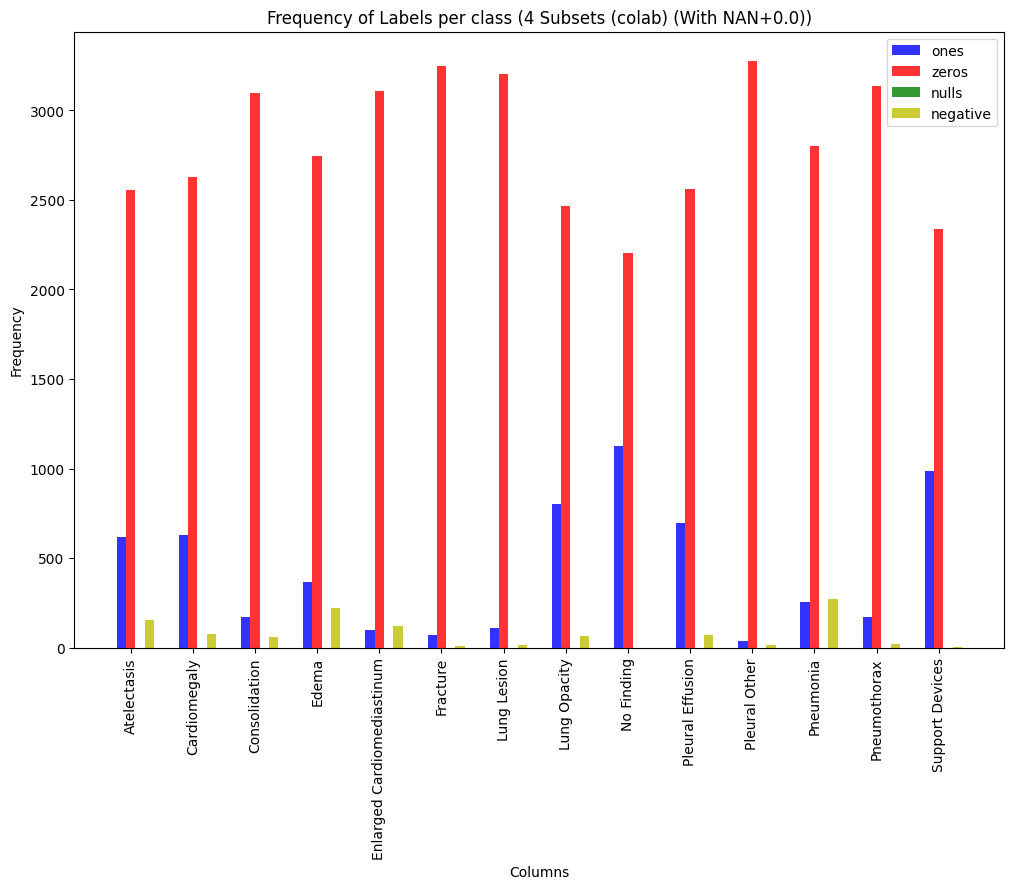

Number of rows dropped: 0
Number of rows remaining: 3328


In [32]:
# Create Deep Copy of the DataFrame
df_merged_zeros_nan = df.copy(deep=True)

# Replace NaN with 0.0
df_merged_zeros_nan.iloc[:, 2:16] = df.iloc[:, 2:16].replace(np.nan, 0.0)

plot_histogram(df=df_merged_zeros_nan,dataset_description=dataset['description']+ f" (With NAN+0.0)" )

# No of rows dropped
print(f"Number of rows dropped: {len(df) - len(df_merged_zeros_nan)}")
# no of rows remaining
print(f"Number of rows remaining: {len(df_merged_zeros_nan)}")

#### Merging Ones & -1

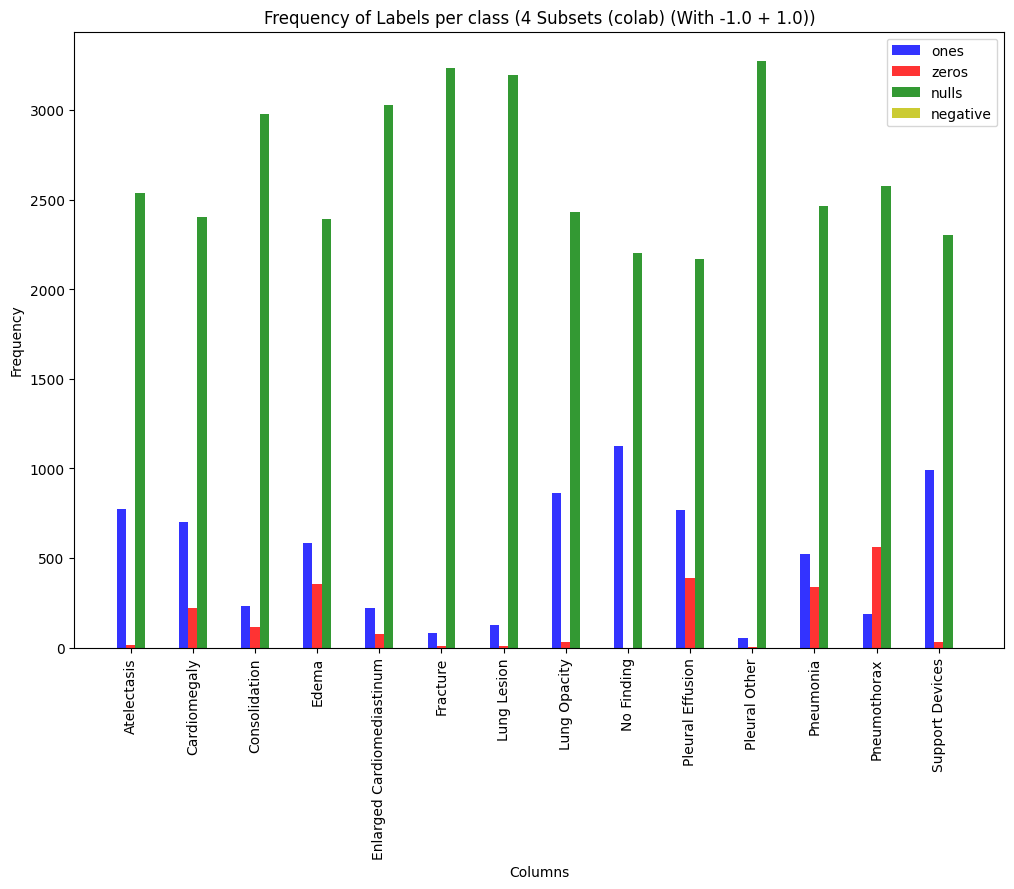

Number of rows dropped: 0
Number of rows remaining: 3328


In [35]:
# Create Deep Copy of the DataFrame
df_merged_ones_neg = df.copy(deep=True)

# Replace NaN with 0.0
df_merged_ones_neg.iloc[:, 2:16] = df.iloc[:, 2:16].replace(-1.0, 1.0)

plot_histogram(df=df_merged_ones_neg,dataset_description=dataset['description']+ f" (With -1.0 + 1.0)" )

# No of rows dropped
print(f"Number of rows dropped: {len(df) - len(df_merged_ones_neg)}")
# no of rows remaining
print(f"Number of rows remaining: {len(df_merged_ones_neg)}")

#### Merging Ones+-1 && Zeroes+NAN 


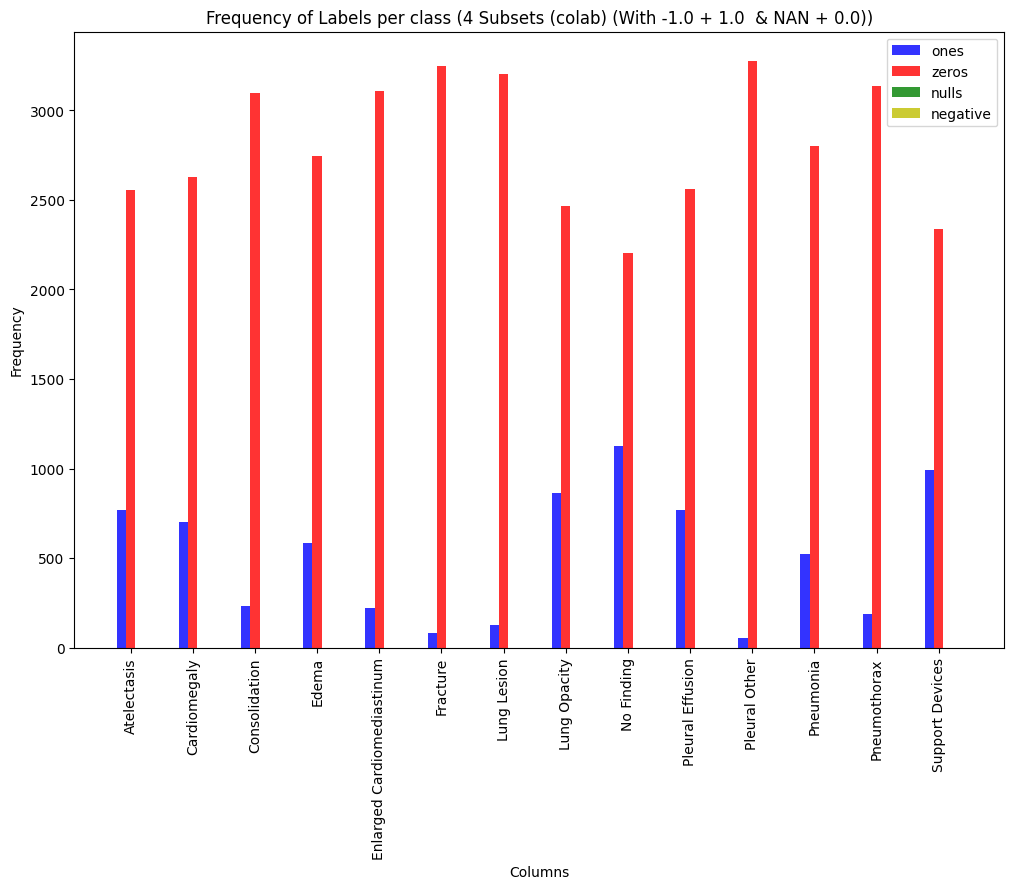

Number of rows dropped: 0
Number of rows remaining: 3328


In [36]:
# Create Deep Copy of the DataFrame
df_merged_ones__neg_nan_zeros = df.copy(deep=True)

# Replace NaN with 0.0
df_merged_ones__neg_nan_zeros.iloc[:, 2:16] = df.iloc[:, 2:16].replace(-1.0, 1.0)
df_merged_ones__neg_nan_zeros.iloc[:, 2:16] = df_merged_ones__neg_nan_zeros.iloc[:, 2:16].replace(np.nan, 0.0)

plot_histogram(df=df_merged_ones__neg_nan_zeros,dataset_description=dataset['description']+ f" (With -1.0 + 1.0  & NAN + 0.0)" )

# No of rows dropped
print(f"Number of rows dropped: {len(df) - len(df_merged_ones__neg_nan_zeros)}")
# no of rows remaining
print(f"Number of rows remaining: {len(df_merged_ones__neg_nan_zeros)}")

### Merge + Drop Rows with high zeros

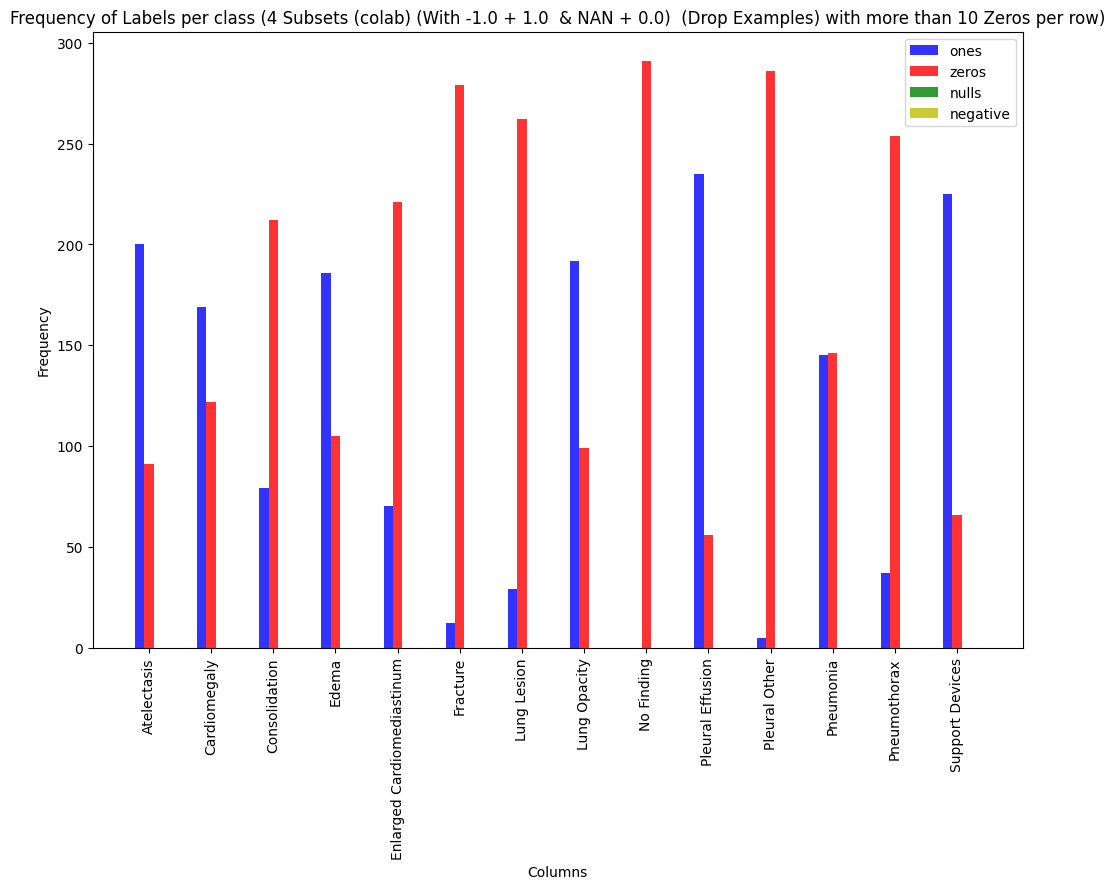

Number of rows dropped: 3037
Number of rows remaining: 291


In [40]:
# Create Deep Copy of the DataFrame
df_merged_ones_neg_nan_zeros = df.copy(deep=True)

# Replace NaN with 0.0
df_merged_ones_neg_nan_zeros.iloc[:, 2:16] = df.iloc[:, 2:16].replace(-1.0, 1.0)
df_merged_ones_neg_nan_zeros.iloc[:, 2:16] = df_merged_ones_neg_nan_zeros.iloc[:, 2:16].replace(np.nan, 0.0)


# Drop rows with more than 7 Zeros values
thresh=10
# Drop rows with high number zeros
df_merged_ones_neg_nan_zeros = df_merged_ones_neg_nan_zeros[(df_merged_ones_neg_nan_zeros==0.0).sum(axis=1)<thresh]

plot_histogram(df=df_merged_ones_neg_nan_zeros,dataset_description=dataset['description']+ f" (With -1.0 + 1.0  & NAN + 0.0)  (Drop Examples) with more than {thresh} Zeros per row" )

# No of rows dropped
print(f"Number of rows dropped: {len(df) - len(df_merged_ones_neg_nan_zeros)}")
# no of rows remaining
print(f"Number of rows remaining: {len(df_merged_ones_neg_nan_zeros)}")

## Ratios

In [43]:
df_final=df_merged_ones_neg_nan_zeros
zeros=[]
nulls=[]
ones=[]
negative=[]

for column in df_final.columns[2:16]:
    zeros.append((df_final[column]==0).sum())
    nulls.append( df_final[column].isnull().sum())
    ones.append((df_final[column]==1).sum())
    negative.append((df_final[column]==-1).sum())

In [45]:
# Calculate ratio of zeros to ones
zero_to_one_ratios = {column: zeros[i] / ones[i] if ones[i] != 0 else float('inf') for i, column in enumerate(df.columns[2:16])}

# Calculate ratio of zeros and NaNs to counts of ones and negative ones
zero_nan_to_one_negative_ratios = {column: (zeros[i] + nulls[i]) / (ones[i] + negative[i]) if ones[i] + negative[i] != 0 else float('inf') for i, column in enumerate(df.columns[2:16])}

# Print ratios
print("Ratio of Zeros to Ones:")
print(zero_to_one_ratios)
print("\nRatio of Zeros and NaNs to Ones and Negative Ones:")
print(zero_nan_to_one_negative_ratios)

Ratio of Zeros to Ones:
{'Atelectasis': 0.455, 'Cardiomegaly': 0.7218934911242604, 'Consolidation': 2.6835443037974684, 'Edema': 0.5645161290322581, 'Enlarged Cardiomediastinum': 3.157142857142857, 'Fracture': 23.25, 'Lung Lesion': 9.03448275862069, 'Lung Opacity': 0.515625, 'No Finding': inf, 'Pleural Effusion': 0.23829787234042554, 'Pleural Other': 57.2, 'Pneumonia': 1.006896551724138, 'Pneumothorax': 6.864864864864865, 'Support Devices': 0.29333333333333333}

Ratio of Zeros and NaNs to Ones and Negative Ones:
{'Atelectasis': 0.455, 'Cardiomegaly': 0.7218934911242604, 'Consolidation': 2.6835443037974684, 'Edema': 0.5645161290322581, 'Enlarged Cardiomediastinum': 3.157142857142857, 'Fracture': 23.25, 'Lung Lesion': 9.03448275862069, 'Lung Opacity': 0.515625, 'No Finding': inf, 'Pleural Effusion': 0.23829787234042554, 'Pleural Other': 57.2, 'Pneumonia': 1.006896551724138, 'Pneumothorax': 6.864864864864865, 'Support Devices': 0.29333333333333333}


In [46]:
# Calculate ratio of zeros to ones
zero_to_one_ratios = {column: zeros[i] / ones[i] if ones[i] != 0 else float('inf') for i, column in enumerate(df.columns[2:16])}

# Calculate ratio of zeros and NaNs to counts of ones and negative ones
zero_nan_to_one_negative_ratios = {column: (zeros[i] + nulls[i]) / (ones[i] + negative[i]) if ones[i] + negative[i] != 0 else float('inf') for i, column in enumerate(df.columns[2:16])}

# Print ratios
print("Ratio of Zeros to Ones:")
print(zero_to_one_ratios)
print("\nRatio of Zeros and NaNs to Ones and Negative Ones:")
print(zero_nan_to_one_negative_ratios)

Ratio of Zeros to Ones:
{'Atelectasis': 0.455, 'Cardiomegaly': 0.7218934911242604, 'Consolidation': 2.6835443037974684, 'Edema': 0.5645161290322581, 'Enlarged Cardiomediastinum': 3.157142857142857, 'Fracture': 23.25, 'Lung Lesion': 9.03448275862069, 'Lung Opacity': 0.515625, 'No Finding': inf, 'Pleural Effusion': 0.23829787234042554, 'Pleural Other': 57.2, 'Pneumonia': 1.006896551724138, 'Pneumothorax': 6.864864864864865, 'Support Devices': 0.29333333333333333}

Ratio of Zeros and NaNs to Ones and Negative Ones:
{'Atelectasis': 0.455, 'Cardiomegaly': 0.7218934911242604, 'Consolidation': 2.6835443037974684, 'Edema': 0.5645161290322581, 'Enlarged Cardiomediastinum': 3.157142857142857, 'Fracture': 23.25, 'Lung Lesion': 9.03448275862069, 'Lung Opacity': 0.515625, 'No Finding': inf, 'Pleural Effusion': 0.23829787234042554, 'Pleural Other': 57.2, 'Pneumonia': 1.006896551724138, 'Pneumothorax': 6.864864864864865, 'Support Devices': 0.29333333333333333}
